In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
df = pd.read_csv('thyroid_cancer_risk_data.csv')
df

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [17]:
print(df.dtypes)

Patient_ID               int64
Age                      int64
Gender                  object
Country                 object
Ethnicity               object
Family_History          object
Radiation_Exposure      object
Iodine_Deficiency       object
Smoking                 object
Obesity                 object
Diabetes                object
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk     object
Diagnosis               object
dtype: object


In [25]:
# Rows and columns
rows, cols = df.shape
print(f"{rows} rows and {cols} columns")

212691 rows and 17 columns


In [19]:
print(df.isnull().sum())

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


In [7]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [9]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [11]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
df.duplicated().sum()

0

In [97]:
df['Diagnosis'].value_counts()

Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64

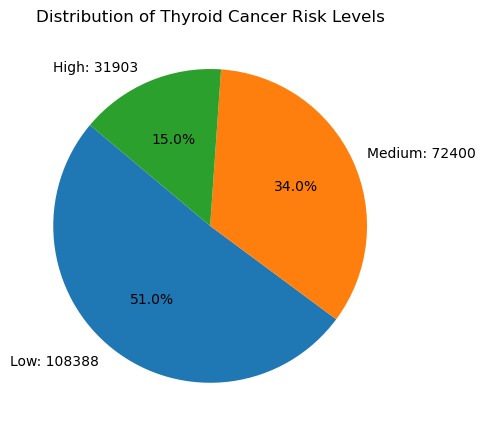

In [41]:
# Count each category
risk_counts = df['Thyroid_Cancer_Risk'].value_counts()

# Create labels with count and percentage
total = risk_counts.sum()
labels = [f'{label}: {count} ' for label, count in zip(risk_counts.index, risk_counts)]

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(risk_counts, labels=labels, autopct = '%1.1f%%', startangle=140)
plt.title('Distribution of Thyroid Cancer Risk Levels')
plt.tight_layout()
plt.show()


#### The pie chart visually shows the proportion of each thyroid cancer risk level. This helps quickly understand the percentage and count of risk levels

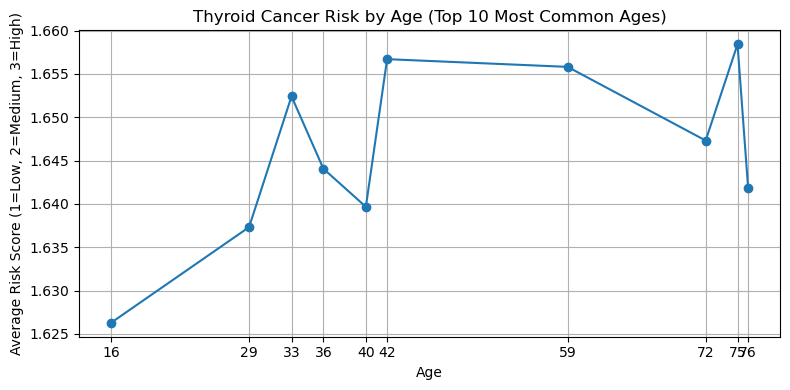

In [9]:
# Map the categorical risk levels to numerical values
risk_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Risk_Score'] = df['Thyroid_Cancer_Risk'].map(risk_mapping)

# Group by Age and calculate the average risk score
agewise_risk = df.groupby('Age')['Risk_Score'].mean()

# Get top 10 most common ages
top_10_ages = df['Age'].value_counts().nlargest(10).index

# Filter and sort agewise risk for these top 10 ages
top_10_agewise_risk = agewise_risk.loc[top_10_ages].sort_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(top_10_agewise_risk.index, top_10_agewise_risk.values, marker='o', linestyle='-')
plt.title('Thyroid Cancer Risk by Age (Top 10 Most Common Ages)')
plt.xlabel('Age')
plt.ylabel('Average Risk Score (1=Low, 2=Medium, 3=High)')
plt.grid(True)
plt.xticks(top_10_agewise_risk.index)
plt.tight_layout()
plt.show()


#### The graph shows that thyroid cancer risk varies across the 10 most common ages, with some age groups having a higher average risk.

C:\Users\harsh\AppData\Local\Temp\ipykernel_27204\1190180301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Gender', palette = 'pastel')


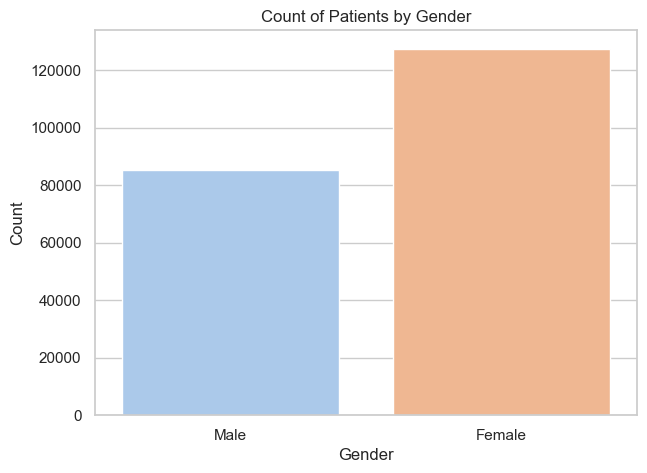

In [59]:
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = 'Gender', palette = 'pastel')

# Add labels and title
plt.title('Count of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

#### we can see which gender has more representation in the dataset, indicating if the patient group is mostly male, female, or relatively balanced.

C:\Users\harsh\AppData\Local\Temp\ipykernel_27204\3007739334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Family_History', palette = 'viridis')


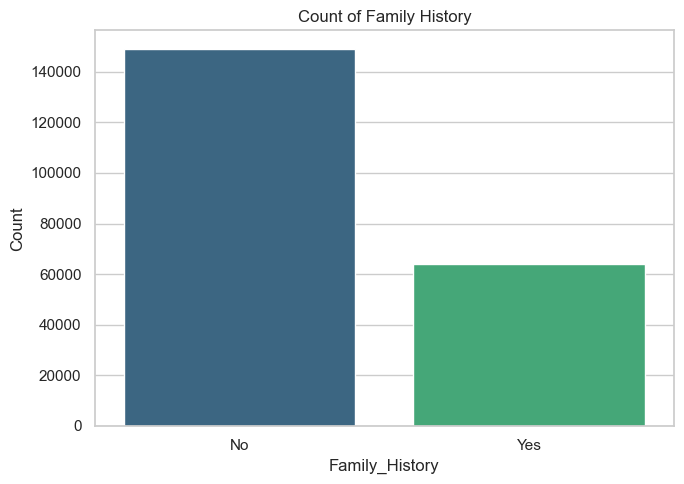

In [61]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'Family_History', palette = 'viridis')
plt.title('Count of Family History')
plt.xlabel('Family_History')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### This chart will immediately reveal the proportion of individuals in the dataset who have a family history of the condition versus those who don't.

C:\Users\harsh\AppData\Local\Temp\ipykernel_27204\396384401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Radiation_Exposure', palette = 'viridis')


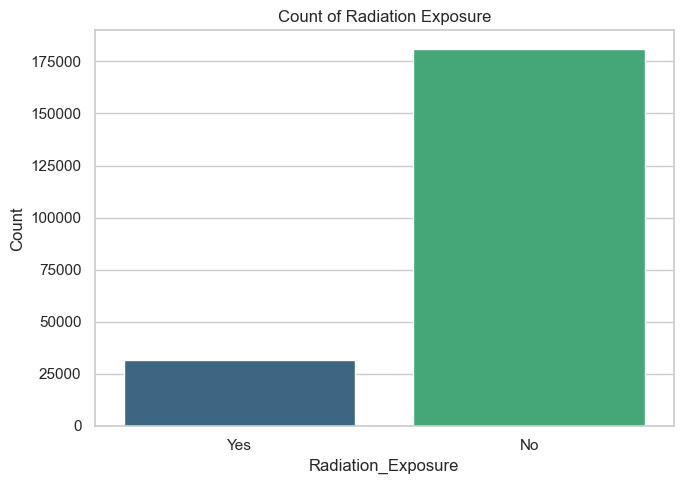

In [63]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'Radiation_Exposure', palette = 'viridis')
plt.title('Count of Radiation Exposure')
plt.xlabel('Radiation_Exposure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### This chart quickly shows how many individuals in the dataset have been exposed to radiation versus those who haven't

C:\Users\harsh\AppData\Local\Temp\ipykernel_27204\2113890329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Iodine_Deficiency', palette = 'viridis')


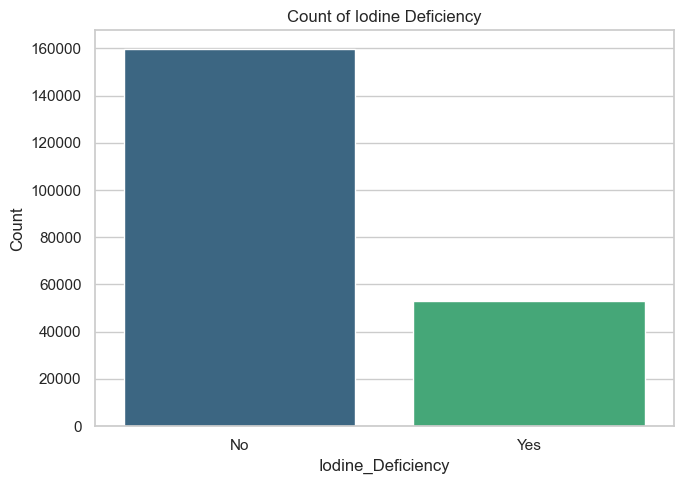

In [65]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'Iodine_Deficiency', palette = 'viridis')
plt.title('Count of Iodine Deficiency')
plt.xlabel('Iodine_Deficiency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### This chart instantly reveals the prevalence of iodine deficiency in the dataset. You'll quickly see how many individuals are iodine deficient versus not.

C:\Users\harsh\AppData\Local\Temp\ipykernel_27204\1018726891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Smoking', palette = 'viridis')


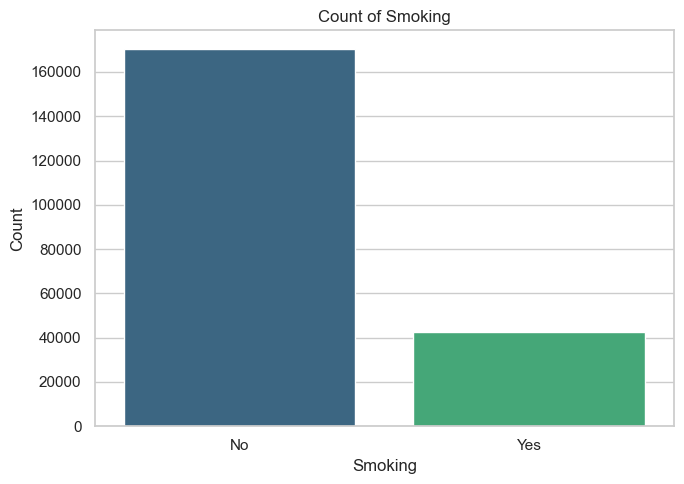

In [67]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'Smoking', palette = 'viridis')
plt.title('Count of Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### This chart quickly shows the number of smokers versus non-smokers in the dataset.

C:\Users\harsh\AppData\Local\Temp\ipykernel_27204\1616179503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Obesity', palette = 'viridis')


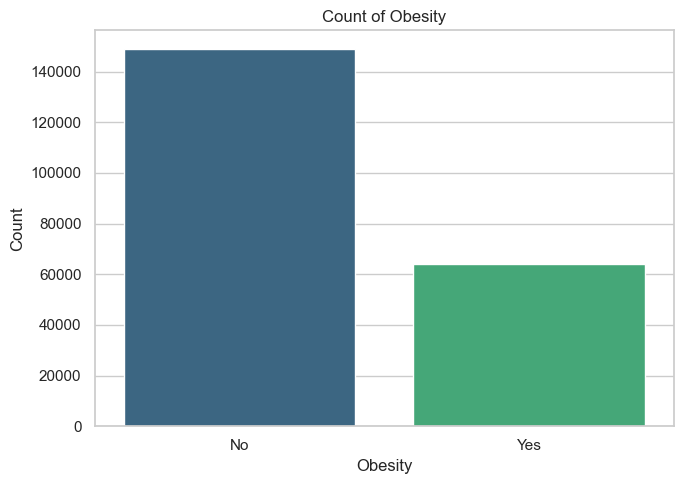

In [69]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'Obesity', palette = 'viridis')
plt.title('Count of Obesity')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### This chart instantly reveals the prevalence of obesity in the dataset. You'll quickly see the exact count of obese versus non-obese individuals.

C:\Users\harsh\AppData\Local\Temp\ipykernel_27204\4128726581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Diabetes', palette = 'viridis')


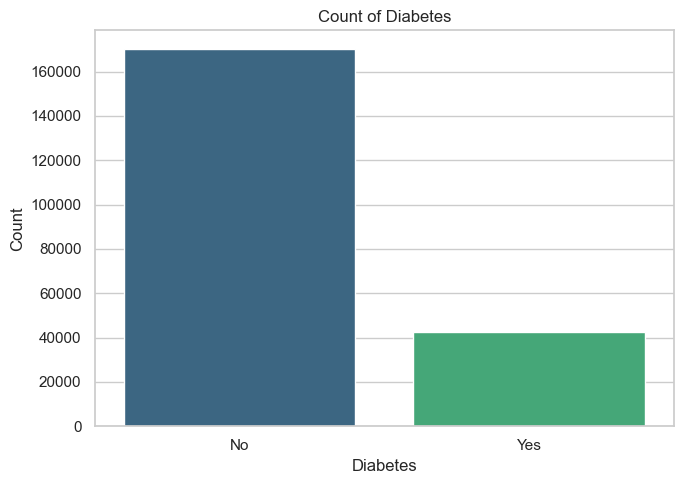

In [71]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'Diabetes', palette = 'viridis')
plt.title('Count of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### This chart quickly shows the prevalence of diabetes within the dataset. You'll instantly see how many patients have diabetes versus those who don't.

C:\Users\harsh\AppData\Local\Temp\ipykernel_27204\4042374425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Diagnosis', palette = 'viridis')


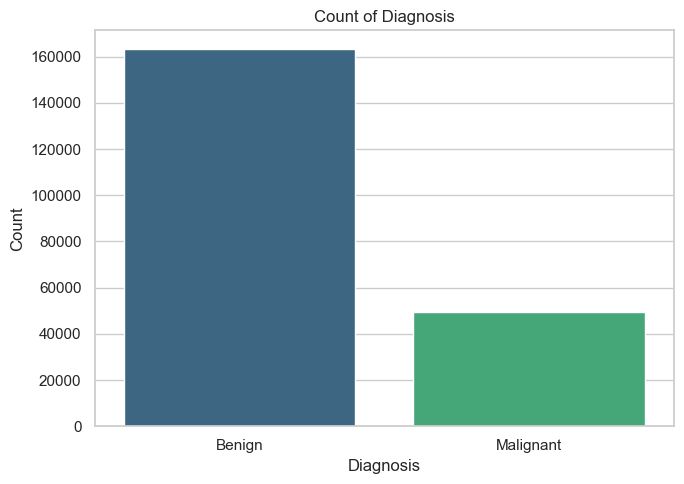

In [75]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'Diagnosis', palette = 'viridis')
plt.title('Count of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### This bar chart directly shows the number of patients for each diagnosis type (e.g., benign, malignant). It quickly reveals which diagnoses are most common and the overall distribution of outcomes in the dataset.

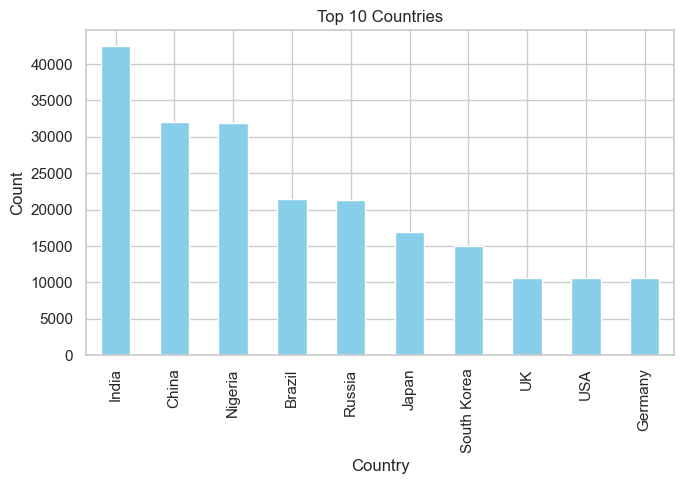

In [79]:
# Top N Countries 
plt.figure(figsize = (7, 5))
df['Country'].value_counts().head(10).plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### This bar chart immediately highlights the top 10 countries represented in the dataset and their respective patient counts. It quickly shows which geographical regions contribute the most data to analyse

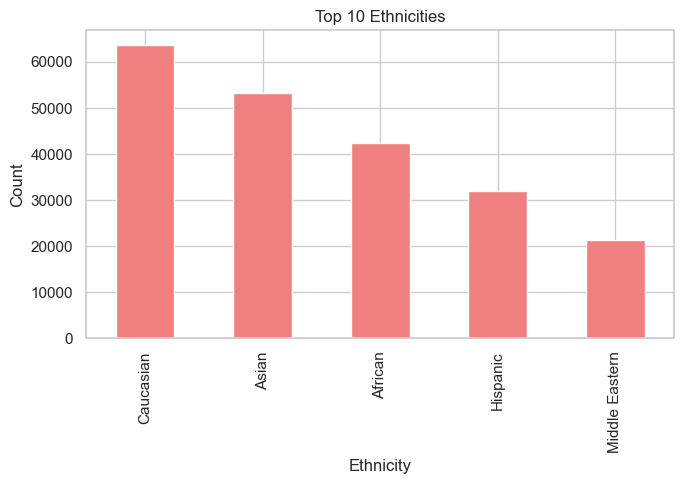

In [81]:
plt.figure(figsize = (7, 5))
df['Ethnicity'].value_counts().head(10).plot(kind = 'bar', color = 'lightcoral')
plt.title('Top 10 Ethnicities')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### This bar chart clearly highlights the ten most common ethnic groups within the dataset and their respective counts. It gives you an immediate understanding of the primary ethnic demographics represented in the data.

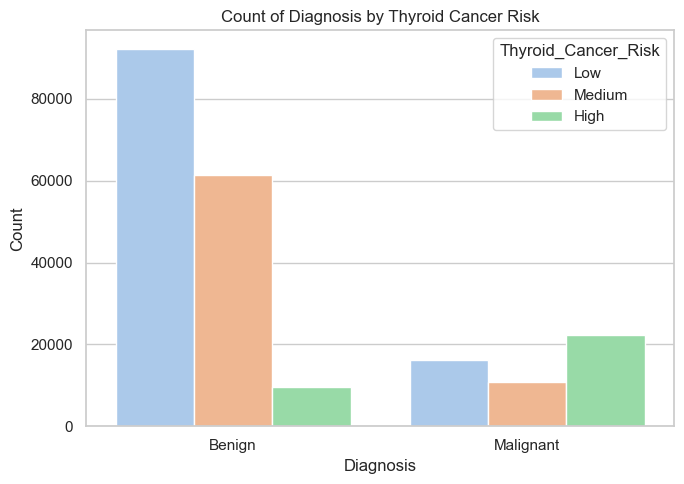

In [87]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Diagnosis', hue='Thyroid_Cancer_Risk', palette='pastel')
plt.title('Count of Diagnosis by Thyroid Cancer Risk')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Thyroid_Cancer_Risk')
plt.tight_layout()
plt.show()


#### This chart reveals how different diagnoses are associated with various thyroid cancer risk levels. we can see, for instance, if a 'Malignant' diagnosis predominantly correlates with 'High Risk', or if 'Benign' diagnoses are mostly 'Low Risk'.

## 🔹 Benign / Malignant
Meaning: Non-cancerous / Cancerous


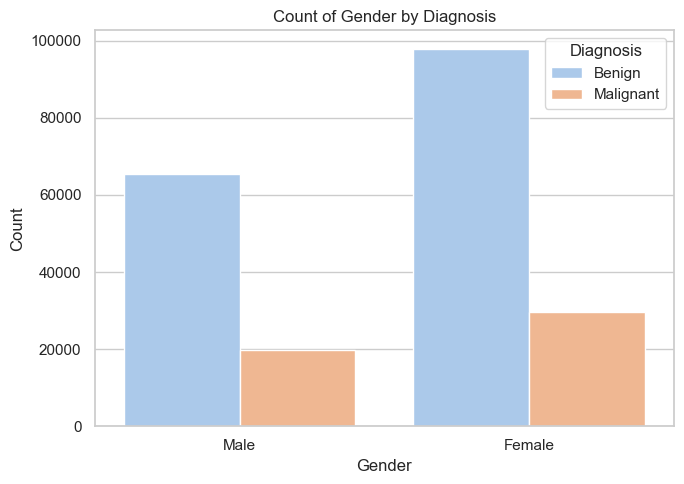

In [89]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Gender', hue='Diagnosis', palette='pastel')
plt.title('Count of Gender by Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


### This chart compares the gender distribution across different diagnoses. 

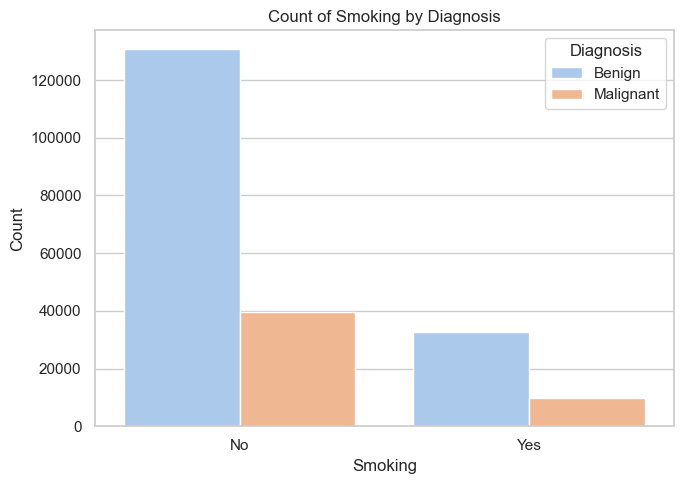

In [91]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Smoking', hue='Diagnosis', palette='pastel')
plt.title('Count of Smoking by Diagnosis')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


### This chart quickly reveals if there's a difference in smoking habits between patients with different diagnoses. we can see whether a specific diagnosis group (e.g., benign vs. malignant) has a higher or lower proportion of smokers.



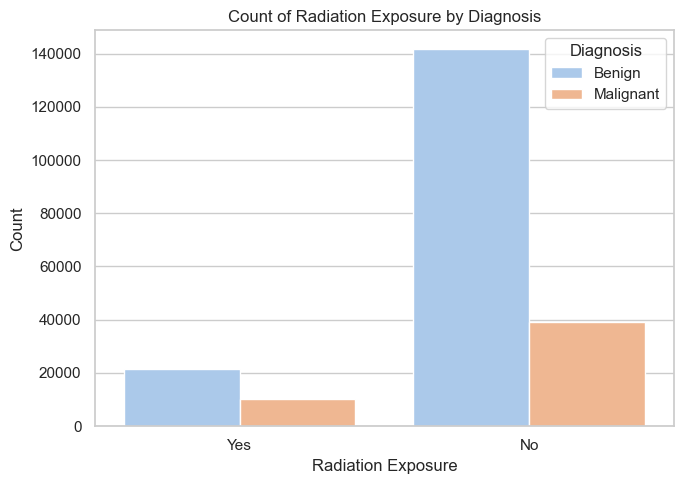

In [93]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Radiation_Exposure', hue='Diagnosis', palette='pastel')
plt.title('Count of Radiation Exposure by Diagnosis')
plt.xlabel('Radiation Exposure')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


### This bar chart breaks down radiation exposure based on diagnosis. we can see if one diagnosis group (e.g., malignant vs. benign) has a noticeably higher or lower proportion of individuals with a history of radiation exposure.

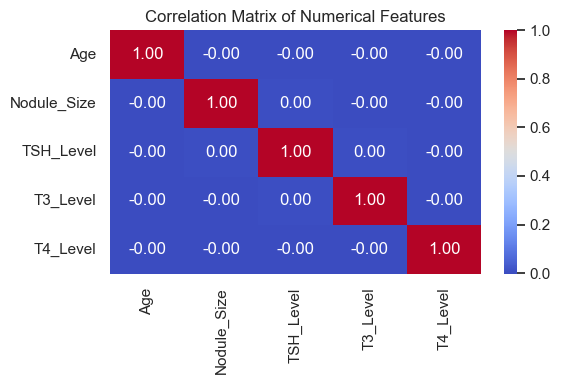

In [104]:
# Select only numerical columns
numerical_cols = ['Age', 'Nodule_Size', 'TSH_Level', 'T3_Level', 'T4_Level']

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and layout
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Strength of linear relationships between numerical variables.

Values range from -1 to 1:

 1 : perfect positive correlation

 0 : no correlation

-1 : perfect negative correlation

### In this chart we can quickly see which pairs of features move together (positive correlation), move opposite each other (negative correlation), or have no strong relationship, indicated by the color and the annot values. This helps understand the underlying relationships between these medical measurements.